<a href="https://colab.research.google.com/github/sandhc1/GUVI_DS/blob/main/Practice/Outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/diabetes.csv')
df.sample(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
589,0,73,0,0,0,21.1,0.342,25,0
702,1,168,88,29,0,35.0,0.905,52,1
277,0,104,64,23,116,27.8,0.454,23,0
352,3,61,82,28,0,34.4,0.243,46,0
485,0,135,68,42,250,42.3,0.365,24,1


**Trimming**

It excludes the outlier values from our analysis. By applying this technique our data becomes thin when there are more outliers present in the dataset. its main advantage is its fastest nature.

In [ ]:
#Finding the Boundary Values
print("Highest allowed",df['BloodPressure'].mean() + 3*df['BloodPressure'].std())
print("Lowest allowed",df['BloodPressure'].mean() - 3*df['BloodPressure'].std())


Highest allowed 127.17289026193433
Lowest allowed 11.038047238065673


In [ ]:
#Finding the Outliers
dfn=df[(df['BloodPressure'] > 127.172890) | (df['BloodPressure'] < 11.038047)]
dfn.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1


In [ ]:
#Trimming of Outliers
new_df = df[(df['BloodPressure'] < 127.172890) & (df['BloodPressure'] > 11.038047)]
new_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


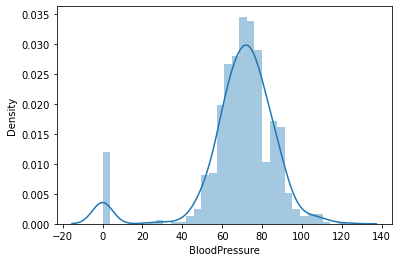

In [ ]:
sns.distplot(df['BloodPressure'])

In [ ]:
#Finding the Boundary Values
print("Highest allowed",df['BMI'].mean() + 3*df['BMI'].std())
print("Lowest allowed",df['BMI'].mean() - 3*df['BMI'].std())

Highest allowed 55.64505908612634
Lowest allowed 8.340097163873661


**capping techniques for outlier**

we cap our outliers data and make the limit i.e, above a particular value or less than 

In [ ]:
#fix limits
upper_limit = df['BloodPressure'].mean() + 3*df['BloodPressure'].std()
lower_limit = df['BloodPressure'].mean() - 3*df['BloodPressure'].std()


In [ ]:
#apply capping
df['BloodPressure'] = np.where(
   df['BloodPressure']>upper_limit,
   upper_limit,
   np.where(
       df['BloodPressure']<lower_limit,
       lower_limit,
       df['BloodPressure']
   )
)


In [ ]:
df['BloodPressure'].describe()

count    768.000000
mean      69.608505
std       17.616411
min       11.038047
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


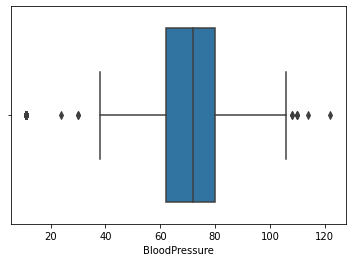

In [ ]:
sns.boxplot(df['BloodPressure'])

**IQR**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/diabetes.csv')

#Finding the IQR
percentile25 = df['Pregnancies'].quantile(0.25)
percentile75 = df['Pregnancies'].quantile(0.75)
iqr=percentile75 - percentile25
print(iqr)
print(percentile25)
print(percentile75)


5.0
1.0
6.0


In [ ]:
#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)


13.5
-6.5


In [ ]:
#finding outliers
df[df['Pregnancies'] > upper_limit]
df[df['Pregnancies'] < lower_limit]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
#trimming
new_df = df[df['Pregnancies'] < upper_limit]
new_df.shape


(764, 9)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

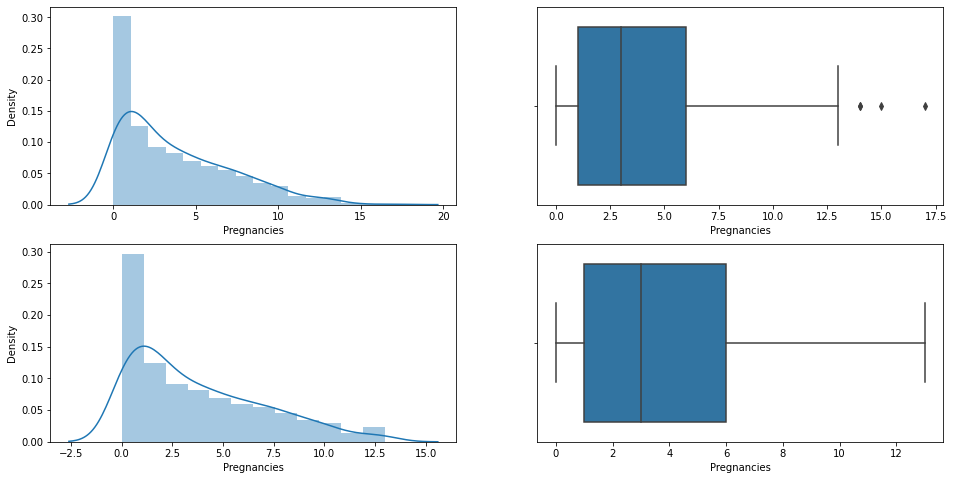

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Pregnancies'])
plt.subplot(2,2,2)
sns.boxplot(df['Pregnancies'])
plt.subplot(2,2,3)
sns.distplot(new_df['Pregnancies'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Pregnancies'])
plt.show()


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/mobileprice.csv")
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
data['mobile_wt'].mean()

140.249

In [ ]:
data['mobile_wt'].nlargest()

29     200
123    200
225    200
282    200
438    200
Name: mobile_wt, dtype: int64

In [ ]:
data['battery_power'].mean()

1238.5185

In [ ]:
data.loc[29]

battery_power     851.0
blue                0.0
clock_speed         0.5
dual_sim            0.0
fc                  3.0
four_g              0.0
int_memory         21.0
m_dep               0.4
mobile_wt         200.0
n_cores             5.0
pc                  7.0
px_height        1171.0
px_width         1263.0
ram               478.0
sc_h               12.0
sc_w                7.0
talk_time          10.0
three_g             1.0
touch_screen        0.0
wifi                1.0
price_range         0.0
Name: 29, dtype: float64

In [ ]:
data['battery_power']
percentile25 = data['battery_power'].quantile(0.25)
percentile75 = data['battery_power'].quantile(0.75)
iqr=percentile75 - percentile25
print(iqr)
print(percentile25)
print(percentile75)

763.5
851.75
1615.25


In [ ]:
#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

2760.5
-293.5


In [ ]:
#finding outliers
data[data['battery_power'] > upper_limit]
data[data['battery_power'] < lower_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [ ]:
#trimming
new_df = data[data['battery_power'] < upper_limit]
new_df.shape

(2000, 21)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

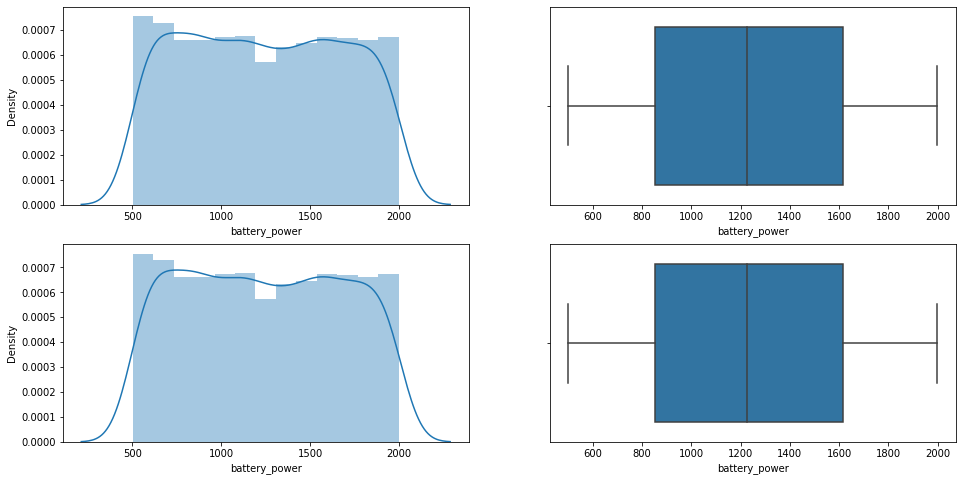

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['battery_power'])
plt.subplot(2,2,2)
sns.boxplot(data['battery_power'])
plt.subplot(2,2,3)
sns.distplot(new_df['battery_power'])
plt.subplot(2,2,4)
sns.boxplot(new_df['battery_power'])
plt.show()